In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv("bestsellers with categories.csv")
print(df.head())
print("\nРозмір таблиці:", df.shape)

# Про скільки книг зберігає дані датасет?
print(f'\nДатасет містить інформацію про {df.shape[0]} книг') # Датасет містить інформацію про 550 книг


                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  

Розмір таблиці: (550, 7)

Датасет містить інформацію про 550 книг


In [29]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']


In [31]:
# Перевірка пропусків
missing_data = df.isna().sum()
print(missing_data)

print("\nЧи є в якихось змінних пропуски?") #ні
if missing_data.sum()==0:
    print('Ні')
else:
    print('Так')

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Чи є в якихось змінних пропуски?
Ні


In [33]:
# Унікальні значення в genre
unique_genres = df['genre'].unique()
print("Унікальні жанри:", unique_genres)

print('\nЯкі є унікальні жанри?') # Non Fiction Fiction
for genre in df['genre'].unique():
    print(genre)

Унікальні жанри: ['Non Fiction' 'Fiction']

Які є унікальні жанри?
Non Fiction
Fiction


<Axes: title={'center': 'Розподіл цін'}, ylabel='Frequency'>

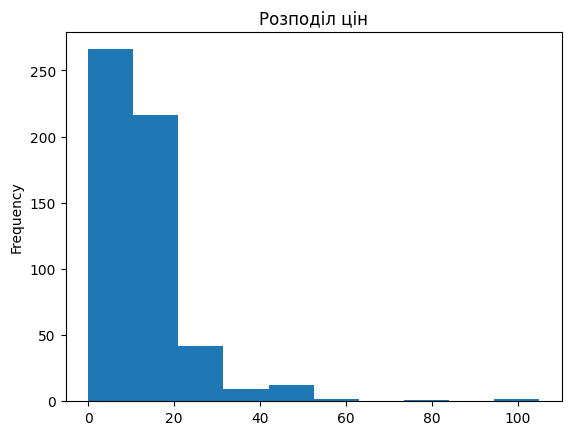

In [34]:
df['price'].plot(kind='hist', title='Розподіл цін')

In [35]:
# Максимальна, мінімальна, середня, медіанна ціна
print("Максимальна ціна:", df['price'].max()) #105
print("Мінімальна ціна:", df['price'].min()) #0
print("Середня ціна:", df['price'].mean()) #13.1
print("Медіанна ціна:", df['price'].median()) #11

Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


In [ ]:
# Найвищий рейтинг
highest_rating = df['user_rating'].max()
print("Найвищий рейтинг:", highest_rating) #4.9

# Кількість книг з найвищим рейтингом
highest_rating_count = df[df['user_rating'] == highest_rating].shape[0]
print("Кількість книг з найвищим рейтингом:", highest_rating_count) #52

# Книга з найбільшою кількістю відгуків
most_reviews = df.loc[df['reviews'].idxmax()]
print("Книга з найбільшою кількістю відгуків:\n", most_reviews) # Where the Crawdads Sing

# Найдорожча книга з Топ-50 2015 року
most_expensive_2015 = df[df['year'] == 2015].sort_values(by='price', ascending=False).iloc[0]
print("\nНайдорожча книга 2015 року:\n", most_expensive_2015) # Publication Manual of the American Psychologic...

# Кількість фікшн книг у 2010 в топ 50
fiction_2010 = df[(df['year'] == 2010) & (df['genre'] == 'Fiction')].shape[0]
print("\nКількість Fiction книг у 2010 в топ-50:", fiction_2010) #20

# Кількість книг з рейтингом 4.9 у 2010 та 2011
high_rating_books = df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))].shape[0]
print("\nКількість книг з рейтингом 4.9 у 2010 та 2011:", high_rating_books) #1

# Сортування за зростанням ціни 
sorted_books = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price')
print("\nОстання книга у відсортованому списку:\n", sorted_books.iloc[-1]) #Old School (Diary of a Whimpy Kid #10)


Найвищий рейтинг: 4.9
Кількість книг з найвищим рейтингом: 52
Книга з найбільшою кількістю відгуків:
 name           Where the Crawdads Sing
author                     Delia Owens
user_rating                        4.8
reviews                          87841
price                               15
year                              2019
genre                          Fiction
Name: 534, dtype: object

Найдорожча книга 2015 року:
 name           Publication Manual of the American Psychologic...
author                        American Psychological Association
user_rating                                                  4.5
reviews                                                     8580
price                                                         46
year                                                        2015
genre                                                Non Fiction
Name: 277, dtype: object

Кількість Fiction книг у 2010 в топ-50: 20

Кількість книг з рейтингом 4.9 у 2010 та 2011

In [ ]:
# Мінімальна і максимальна ціна для кожного жанру
price_stats = df.groupby('genre')['price'].agg(['min', 'max']) #min 0 0 max 82 105 (fiction non fiction)
print(price_stats)

# Кількість книг для кожного автора
author_books = df.groupby('author')['name'].count().reset_index(name='book_count')
print("\nРозмір таблиці авторів:", author_books.shape) # (248, 2)

# Автор з найбільшою кількістю книг
top_author = author_books.loc[author_books['book_count'].idxmax()]
print("\nАвтор з найбільшою кількістю книг:", top_author) # Jeff Kinney, 12 книг

# Середній рейтинг для кожного автора
author_ratings = df.groupby('author')['user_rating'].mean().reset_index(name='avg_rating')

# Автор із мінімальним середнім рейтингом
lowest_rating_author = author_ratings.loc[author_ratings['avg_rating'].idxmin()]
print("\nАвтор з мінімальним рейтингом:", lowest_rating_author) # Donna Tartt, 3.9


# Злиття таблиць
combined_data = pd.concat([author_books.set_index('author'), author_ratings.set_index('author')], axis=1).reset_index()
sorted_combined_data = combined_data.sort_values(by=['book_count', 'avg_rating'], ascending=[True, True])
print("\nПерший автор у списку:", sorted_combined_data.iloc[0]) #Muriel Barbery


             min  max
genre                
Fiction        0   82
Non Fiction    0  105

Розмір таблиці авторів: (248, 2)

Автор з найбільшою кількістю книг: author        Jeff Kinney
book_count             12
Name: 120, dtype: object

Автор з мінімальним рейтингом: author        Donna Tartt
avg_rating            3.9
Name: 71, dtype: object

Перший автор у списку: author        Muriel Barbery
book_count                 1
avg_rating               4.0
Name: 171, dtype: object


In [ ]:
sorted_combined_data.to_csv('authors_analysis.csv', index=False)


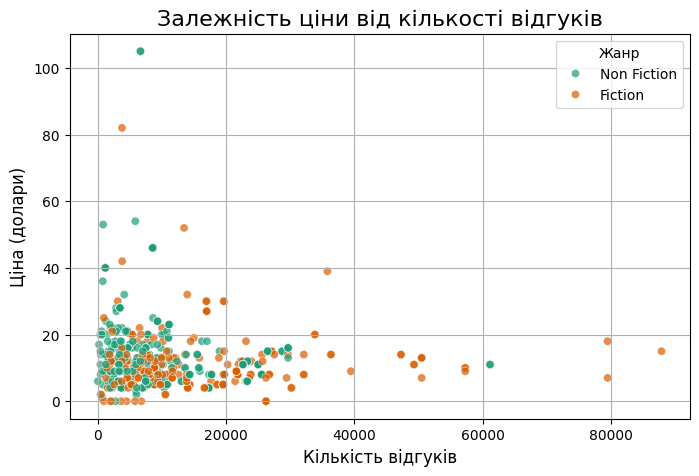

In [26]:
# 4. Залежність ціни від кількості відгуків
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Reviews", y="Price", hue="Genre", palette="Dark2", alpha=0.7)
plt.title("Залежність ціни від кількості відгуків", fontsize=16)
plt.xlabel("Кількість відгуків", fontsize=12)
plt.ylabel("Ціна (долари)", fontsize=12)
plt.legend(title="Жанр")
plt.grid(True)
plt.show()

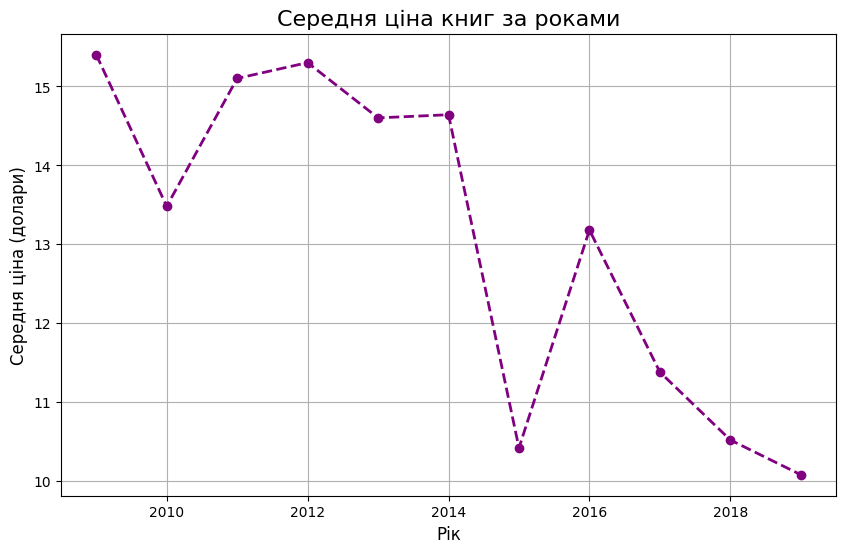

In [ ]:
#Середня ціна книг за роками
average_price_per_year = df.groupby("Year")["Price"].mean()
plt.figure(figsize=(10, 6))
average_price_per_year.plot(kind="line", marker="o", color="purple", linestyle="--", linewidth=2)
plt.title("Середня ціна книг за роками", fontsize=16)
plt.xlabel("Рік", fontsize=12)
plt.ylabel("Середня ціна (долари)", fontsize=12)
plt.grid(True)
plt.show()

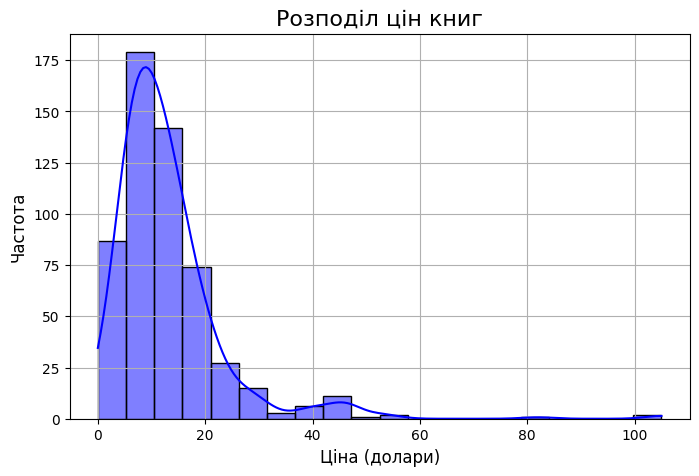

In [ ]:
#Гістограма розподілу цін
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], bins=20, kde=True, color="blue")
plt.title("Розподіл цін книг", fontsize=16)
plt.xlabel("Ціна (долари)", fontsize=12)
plt.ylabel("Частота", fontsize=12)
plt.grid(True)
plt.show()